In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import joblib

In [217]:
df = pd.read_csv('Loan_default.csv')

In [218]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [219]:
df_new = df

In [220]:
def add_age_group(df):
    df = df.copy()
    df['AgeGroup'] = pd.cut(
        df['Age'],
        bins=[17, 25, 35, 45, 60, 100],
        labels=['Young', 'Early Career', 'Mid Career', 'Mature', 'Senior']
    )
    return df

In [221]:
df_new = add_age_group(df)


In [222]:
df_new[['Age', 'AgeGroup']].head()


,Age,AgeGroup
0,56,Mature
1,69,Senior
2,46,Mature
3,32,Early Career
4,60,Mature


In [223]:
df_new = df_new.drop(columns=['Age','LoanID'])


In [224]:
df_new.head()

,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,AgeGroup
0,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Mature
1,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Senior
2,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,Mature
3,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,Early Career
4,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,Mature


In [225]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Income          255347 non-null  int64   
 1   LoanAmount      255347 non-null  int64   
 2   CreditScore     255347 non-null  int64   
 3   MonthsEmployed  255347 non-null  int64   
 4   NumCreditLines  255347 non-null  int64   
 5   InterestRate    255347 non-null  float64 
 6   LoanTerm        255347 non-null  int64   
 7   DTIRatio        255347 non-null  float64 
 8   Education       255347 non-null  object  
 9   EmploymentType  255347 non-null  object  
 10  MaritalStatus   255347 non-null  object  
 11  HasMortgage     255347 non-null  object  
 12  HasDependents   255347 non-null  object  
 13  LoanPurpose     255347 non-null  object  
 14  HasCoSigner     255347 non-null  object  
 15  Default         255347 non-null  int64   
 16  AgeGroup        255347 non-null  categ

In [226]:
df_new['IncomeGroup'] = pd.cut(
    df_new['Income'],
    bins=[0, 40000, 70000, 100000, 150000, 1e9],
    labels=['Low', 'Lower-Mid', 'Mid', 'High', 'Very High']
)
df_new.drop(columns=['Income'], inplace=True)


In [227]:
df_new['CreditScoreBand'] = pd.cut(
    df['CreditScore'],
    bins=[0, 579, 669, 739, 799, 900],
    labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
)
df_new.drop(columns=['CreditScore'], inplace=True)


In [228]:
df_new['LoanTermGroup'] = pd.cut(
    df['LoanTerm'],
    bins=[0, 24, 36, 60],
    labels=['Short', 'Medium', 'Long']
)
df_new.drop(columns=['LoanTerm'], inplace=True)


In [229]:
df_new.head()

,LoanAmount,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,AgeGroup,IncomeGroup,CreditScoreBand,LoanTermGroup
0,50587,80,4,15.23,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Mature,Mid,Poor,Medium
1,124440,15,1,4.81,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Senior,Lower-Mid,Poor,Long
2,129188,26,3,21.17,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,Mature,Mid,Poor,Short
3,44799,0,3,7.07,0.23,High School,Full-time,Married,No,No,Business,No,0,Early Career,Low,Very Good,Short
4,9139,8,4,6.51,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,Mature,Low,Fair,Long


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


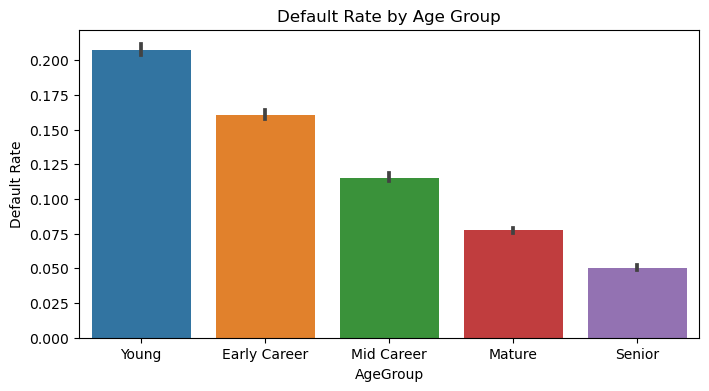

In [230]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=df_new,
    x='AgeGroup',
    y='Default',
    estimator=lambda x: sum(x)/len(x)
)
plt.title("Default Rate by Age Group")
plt.ylabel("Default Rate")
plt.show()


Default Rate by Income Group

In [231]:
df_new['IncomeGroup'].value_counts()

IncomeGroup
High         94565
Mid          56937
Lower-Mid    56601
Low          47244
Very High        0
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


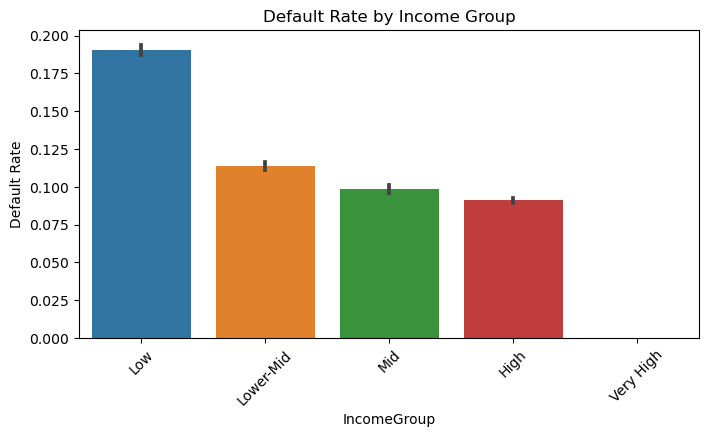

In [232]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=df_new,
    x='IncomeGroup',
    y='Default',
    estimator='mean'
)
plt.title("Default Rate by Income Group")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.show()


CreditScoreBand vs Default

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


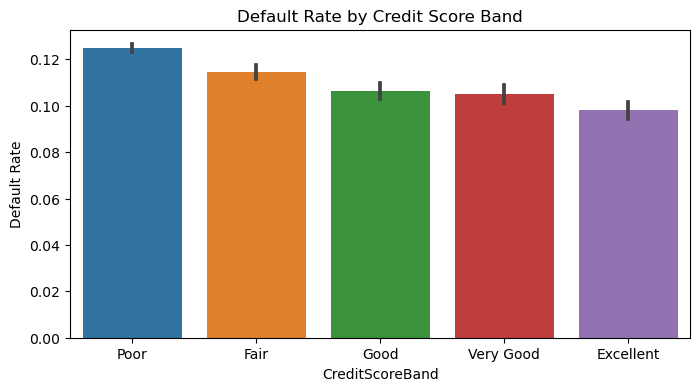

In [233]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=df_new,
    x='CreditScoreBand',
    y='Default',
    estimator=lambda x: sum(x)/len(x)
)
plt.title("Default Rate by Credit Score Band")
plt.ylabel("Default Rate")
plt.show()


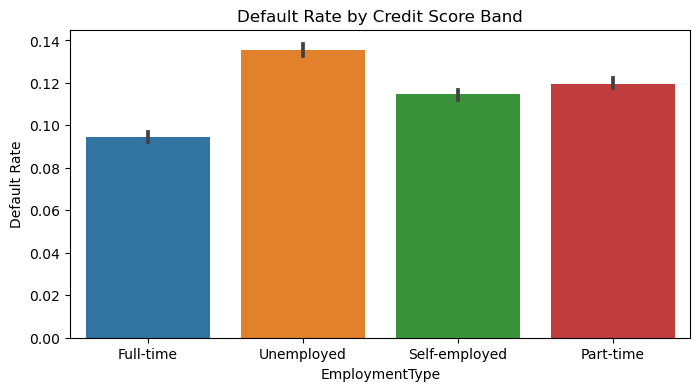

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=df_new,
    x='EmploymentType',
    y='Default',
    estimator=lambda x: sum(x)/len(x)
)
plt.title("Default Rate by EmploymentType")
plt.ylabel("Default Rate")
plt.show()


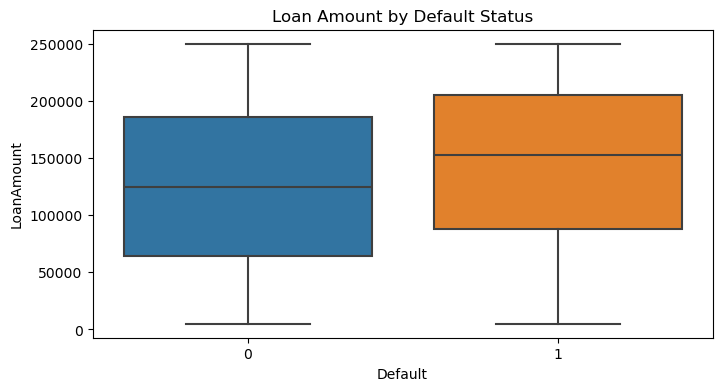

In [235]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Default', y='LoanAmount')
plt.title("Loan Amount by Default Status")
plt.show()


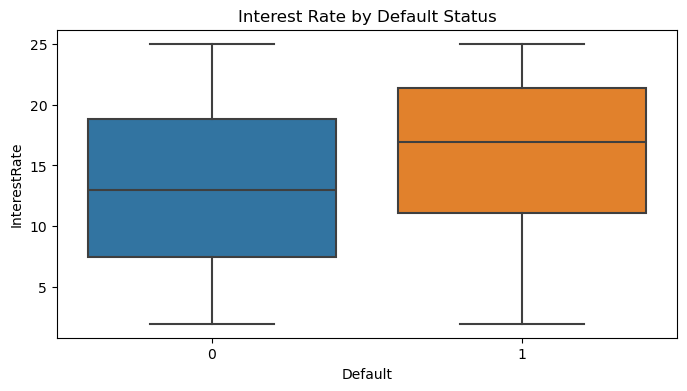

In [236]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_new, x='Default', y='InterestRate')
plt.title("Interest Rate by Default Status")
plt.show()


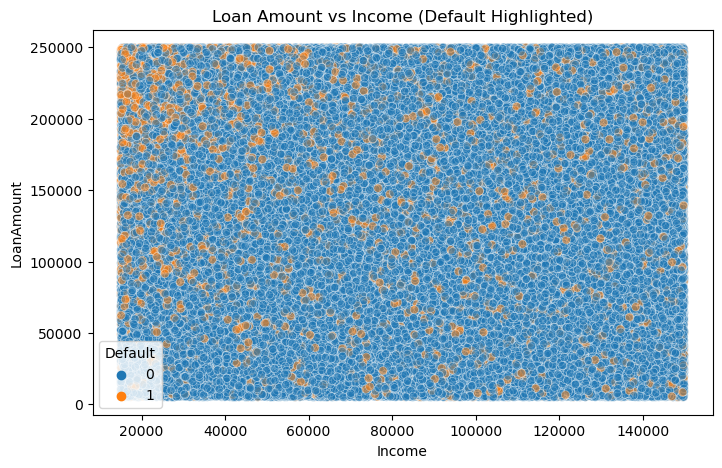

In [237]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='Income',
    y='LoanAmount',
    hue='Default',
    alpha=0.5
)
plt.title("Loan Amount vs Income (Default Highlighted)")
plt.show()


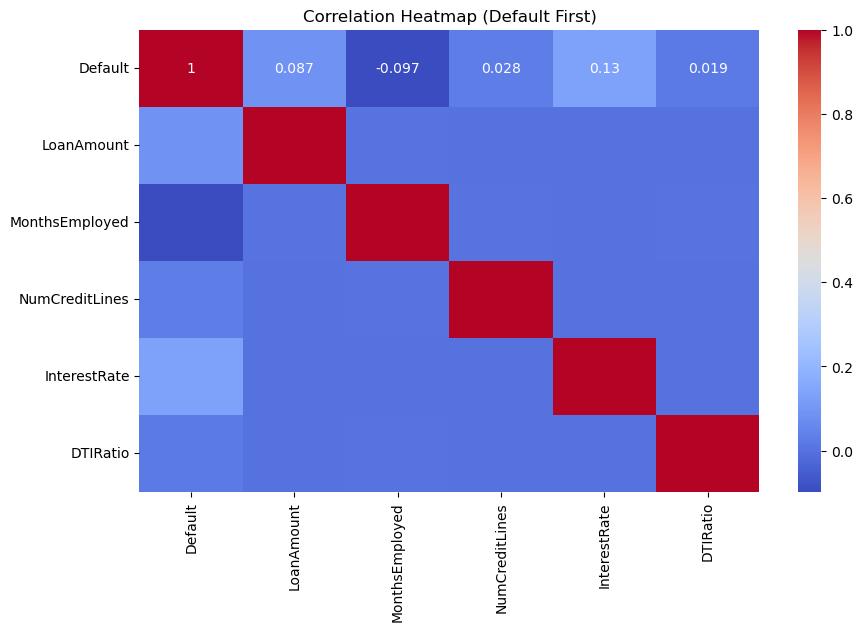

In [238]:
numeric_cols = df_new.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Move Default to the front
numeric_cols.remove('Default')
numeric_cols = ['Default'] + numeric_cols

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    df_new[numeric_cols].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap (Default First)")
plt.show()

In [239]:
df_new.shape

(255347, 17)

In [240]:
df_new.head()

,LoanAmount,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,AgeGroup,IncomeGroup,CreditScoreBand,LoanTermGroup
0,50587,80,4,15.23,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Mature,Mid,Poor,Medium
1,124440,15,1,4.81,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Senior,Lower-Mid,Poor,Long
2,129188,26,3,21.17,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,Mature,Mid,Poor,Short
3,44799,0,3,7.07,0.23,High School,Full-time,Married,No,No,Business,No,0,Early Career,Low,Very Good,Short
4,9139,8,4,6.51,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,Mature,Low,Fair,Long


In [241]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [242]:
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']

# Map Yes/No to 1/0
for col in binary_cols:
    df_new[col] = df_new[col].map({'Yes': 1, 'No': 0})


In [243]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   LoanAmount       255347 non-null  int64   
 1   MonthsEmployed   255347 non-null  int64   
 2   NumCreditLines   255347 non-null  int64   
 3   InterestRate     255347 non-null  float64 
 4   DTIRatio         255347 non-null  float64 
 5   Education        255347 non-null  object  
 6   EmploymentType   255347 non-null  object  
 7   MaritalStatus    255347 non-null  object  
 8   HasMortgage      255347 non-null  int64   
 9   HasDependents    255347 non-null  int64   
 10  LoanPurpose      255347 non-null  object  
 11  HasCoSigner      255347 non-null  int64   
 12  Default          255347 non-null  int64   
 13  AgeGroup         255347 non-null  category
 14  IncomeGroup      255347 non-null  category
 15  CreditScoreBand  255347 non-null  category
 16  LoanTermGroup    255

In [244]:
df_new['EmploymentType'].value_counts()

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

In [245]:
df_new['MaritalStatus'].value_counts()

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

In [246]:
numeric_cols

['Default',
 'LoanAmount',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'DTIRatio']

In [247]:
numeric_cols = numeric_cols + binary_cols
numeric_cols

['Default',
 'LoanAmount',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'DTIRatio',
 'HasMortgage',
 'HasDependents',
 'HasCoSigner']

In [248]:
categorical_cols = df_new.select_dtypes(include=['object','category']).columns.tolist()
categorical_cols

['Education',
 'EmploymentType',
 'MaritalStatus',
 'LoanPurpose',
 'AgeGroup',
 'IncomeGroup',
 'CreditScoreBand',
 'LoanTermGroup']

In [249]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   LoanAmount       255347 non-null  int64   
 1   MonthsEmployed   255347 non-null  int64   
 2   NumCreditLines   255347 non-null  int64   
 3   InterestRate     255347 non-null  float64 
 4   DTIRatio         255347 non-null  float64 
 5   Education        255347 non-null  object  
 6   EmploymentType   255347 non-null  object  
 7   MaritalStatus    255347 non-null  object  
 8   HasMortgage      255347 non-null  int64   
 9   HasDependents    255347 non-null  int64   
 10  LoanPurpose      255347 non-null  object  
 11  HasCoSigner      255347 non-null  int64   
 12  Default          255347 non-null  int64   
 13  AgeGroup         255347 non-null  category
 14  IncomeGroup      255347 non-null  category
 15  CreditScoreBand  255347 non-null  category
 16  LoanTermGroup    255

In [250]:
df_new.shape

(255347, 17)

In [251]:
df_new.head()


,LoanAmount,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,AgeGroup,IncomeGroup,CreditScoreBand,LoanTermGroup
0,50587,80,4,15.23,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0,Mature,Mid,Poor,Medium
1,124440,15,1,4.81,0.68,Master's,Full-time,Married,0,0,Other,1,0,Senior,Lower-Mid,Poor,Long
2,129188,26,3,21.17,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1,Mature,Mid,Poor,Short
3,44799,0,3,7.07,0.23,High School,Full-time,Married,0,0,Business,0,0,Early Career,Low,Very Good,Short
4,9139,8,4,6.51,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0,Mature,Low,Fair,Long


In [252]:


# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)  # only multi-category cols
    ]
)


In [253]:
numeric_cols = ['LoanAmount', 'MonthsEmployed', 'NumCreditLines', 'InterestRate'] + binary_cols

# Categorical columns
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose',
                    'AgeGroup', 'IncomeGroup', 'CreditScoreBand', 'LoanTermGroup']

X = df_new[numeric_cols + categorical_cols]
y = df_new['Default']

In [254]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [255]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)


In [256]:
logreg_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', logreg_model)
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['LoanAmount',
                                                   'MonthsEmployed',
                                                   'NumCreditLines',
                                                   'InterestRate',
                                                   'HasMortgage',
                                                   'HasDependents',
                                                   'HasCoSigner']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Education',
                                                   'EmploymentType',
                                                   'MaritalStatus',
                                                   'LoanPurpose', 'AgeGroup',
                                                   'IncomeGroup',
                                                   'CreditScoreBand',
                                                   'LoanTermGroup'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [257]:
# Predict class labels based on 0.5 threshold
y_pred = pipeline.predict(X_test)


In [258]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     45139
           1       0.22      0.70      0.33      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.73     51070



In [259]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.6862934655589352
